In [14]:
%reset

In [28]:
import numpy as np
from skimage.morphology import disk, dilation
from augment_annotation import augment_annotation
from load_annotation_data import load_annotation_data
import matplotlib.pyplot as plt
import os

In [29]:
# Pre - inputs
pth = r'\\10.99.68.52\Kiemendata\Valentina Matos\coda to python\test model'
pthDL = r'\\10.99.68.52\Kiemendata\Valentina Matos\coda to python\test model\04_19_2024'
pthim_ann = r'\\10.99.68.52\Kiemendata\Valentina Matos\coda to python\test model\5x'
classcheck = 0
_, numann = load_annotation_data(pthDL, pth, pthim_ann,classcheck)

pthlabel = r'\\10.99.68.52\Kiemendata\Valentina Matos\coda to python\test model\data\SG_014_0016\04_19_2024_boundbox\label'
pthim = r'\\10.99.68.52\Kiemendata\Valentina Matos\coda to python\test model\data\SG_014_0016\04_19_2024_boundbox\im'
imnm = '00276.tif'
size_tile = 10200
imT = np.zeros((size_tile, size_tile), dtype=np.uint8)
pth = r'\\10.99.68.52\Kiemendata\Valentina Matos\coda to python\test model'


 
Importing annotation data...
Image 1 of 2: SG_013_0061
 1. of 4. Importing annotation data from xml file
Creating file...
  Existing TA loaded
 2. of 4. Interpolating annotated regions and saving mask image
4. of 4. Creating bounding box tiles of all annotations


NameError: name 'data' is not defined

In [12]:
# ________inputs of the function
im = np.array(plt.imread(os.path.join(pthim, imnm)), dtype=np.float64)
TA = np.array(plt.imread(os.path.join(pthlabel, imnm)), dtype=np.float64)
do_augmentation = True
class_id = 1
big_tile_size = imT.shape[0] 
print(f'big tile size: {big_tile_size}')
Shape_numann = 11
print(f'Shape Numann: {Shape_numann}')
num_pixels_class = np.zeros(Shape_numann, dtype=np.int32)
kpall = 1

big tile size: 10200
Shape Numann: 11


In [6]:

if do_augmentation:
    im, TA = augment_annotation(im, TA, 1, 1, 1, 1, 0)
else:
    im, TA = augment_annotation(im, TA, 1, 1, 0, 0, 0)

if kpall == 0:
    maxn = num_pixels_class[type]
    kp = num_pixels_class <= maxn * 1.05
else:
    kp = num_pixels_class >= 0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


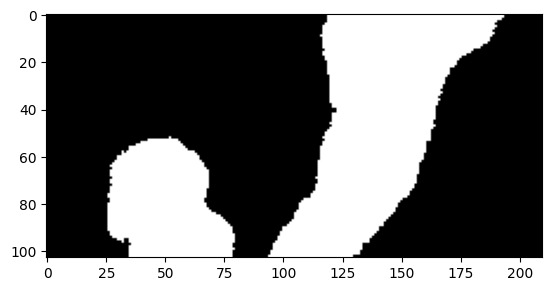

In [7]:
plt.imshow(im)
plt.show()

In [ ]:

kp = np.concatenate(([0], kp))

tmp = kp[TA.astype(int) + 1] #one or the other
# tmp = kp[(TA + 1).astype(bool)]

dil = np.random.randint(15) + 15
tmp = dilation(tmp, disk(dil))

TA = TA * tmp
im[tmp] *= tmp

p1 = min([big_tile_size, TA.shape[0]])
p2 = min([big_tile_size, TA.shape[1]])
im = im[0:p1, 0:p2, :]
TA = TA[0:p1, 0:p2]

#return variables

im = im.astype(np.uint8)
TA = TA.astype(np.uint8)
kpout = np.unique(TA)
kpout = kpout[1:]
